In [77]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture
from matplotlib.colors import LogNorm
from sklearn.neighbors import KNeighborsClassifier

import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.metrics import classification_report,confusion_matrix,f1_score,roc_curve,roc_auc_score

import warnings
warnings.filterwarnings("ignore")

In [78]:
data_X_train = pd.read_csv('samsung_train.txt', header=None, delim_whitespace=True)
data_X_test  = pd.read_csv('samsung_test.txt', header=None, delim_whitespace=True)
data_y_train = pd.read_csv('samsung_train_labels.txt', header=None, delim_whitespace=True)
data_y_test  = pd.read_csv('samsung_test_labels.txt', header=None, delim_whitespace=True)

X_full = pd.concat([data_X_train,data_X_test], ignore_index=True)
y_full = pd.concat([data_y_train,data_y_test], ignore_index=True)

In [79]:
print('Trainig - shape:',data_X_train.shape)
print('Test - shape: ',data_X_test.shape)
print('Full - shape: ',X_full.shape)

Trainig - shape: (7352, 561)
Test - shape:  (2947, 561)
Full - shape:  (10299, 561)


In [80]:
data_X_train.duplicated().sum()

0

In [81]:
data_X_train.isna().values.sum()

0

In [82]:
y_1=data_y_test.value_counts(normalize=True).round(4)
y_2=data_y_train.value_counts(normalize=True).round(4)
y_3=y_full.value_counts(normalize=True).round(4)
df=pd.concat({'Y test':y_1,'Y train':y_2,'Y full':y_3},axis=1)
df

,Y test,Y train,Y full
0,,,
6,0.1822,0.1914,0.1888
5,0.1805,0.1869,0.1851
1,0.1683,0.1668,0.1672
4,0.1666,0.1749,0.1725
2,0.1598,0.1459,0.1499
3,0.1425,0.1341,0.1365


In [83]:
scaler = StandardScaler()
X_full_standardized =scaler.fit_transform(X_full)
X_full_standardized=pd.DataFrame(X_full_standardized)
y_full=pd.DataFrame(y_full)

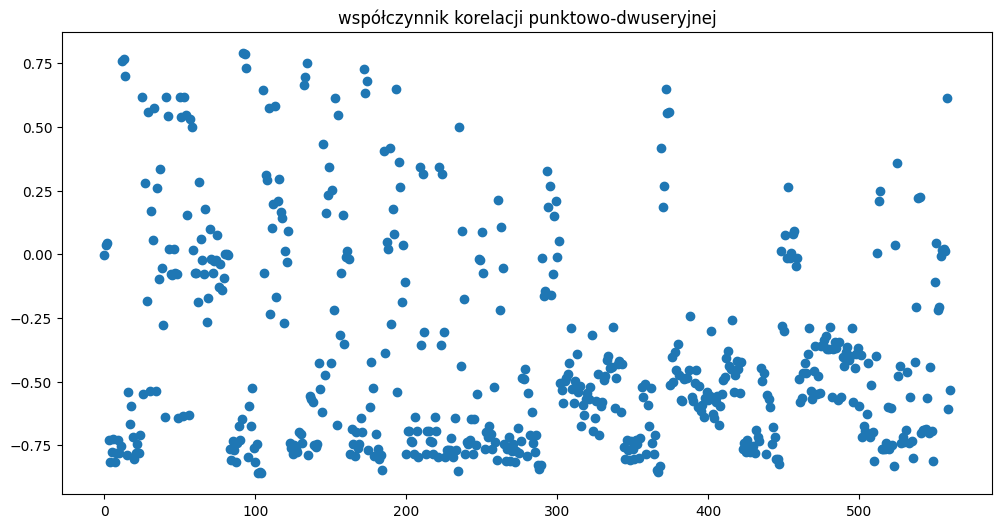

In [84]:
corr_dict = {}
for col in X_full:
    corr_dict[col] = stats.pointbiserialr(X_full[col], y_full)[0]
corr_dict_series=pd.Series(corr_dict)

plt.figure(figsize=(12, 6))
plt.scatter(corr_dict_series.index, corr_dict_series.values)
plt.title("współczynnik korelacji punktowo-dwuseryjnej")
plt.show()

### Czy potrzeba wszystkich cech?
Patrząc na wykres "współczynnik korelacji punktowo-dwuseryjnej", moglibyśmy się pozbyć większości cech z wartośćiami w przedziale (-0.25,0.25). Zajmujemy się jednak Uczeniem Nienadzorowanym więc ten wykres jest tylko ciekawostką ;) , a zamiast tego skorzystaliśmy z PCA.
## Czy potrzebna jest jakaś obróbka? Czy wiemy, jak obrobić?
Tak. Sprawdzamy czy mamy jakieś null i duplikaty. Robimy standaryzację i PCA.
### Czy wiemy, co jaka cecha znaczy?
Wszelkie informacje odnośnie cech zawarte są w pliku features_info
### Czy potrzebujemy aż dwóch plików?
Tak, im większy zbiór, tym lepiej. Pomiary zostały przeprowadzone przez grupę 30 ochotników w wieku 19-48 lat. Podzieleni zostali na grupy Test/Train w proporcji 30/70 losowo. Ze względu na, zakładam, różne uwarunkowania fizyczne, jestem za zsumowaniem danych i ich ewentualnym podziale poprzez train_test_split.
### Pamiętajmy, że mamy do czynienia z Unsupervised Learning. Czy podział na dane testowe i treningowe jest potrzebny, jeśli tak to dlaczego, jeśli nie to dlaczego?
Nie jest potrzebny. Z założenia Algorytmy Unsupervised Learning do działania potrzebują TYLKO danych wejściowych.

## PCA

In [85]:
pca = PCA(n_components=10, random_state=42)
X_full_standardized_pca = pca.fit_transform(X_full_standardized)
X_full_standardized_pca = pd.DataFrame(X_full_standardized_pca)

X_full_standardized_pca

,0,1,2,3,4,5,6,7,8,9
0,-16.380980,1.995083,3.415684,-0.649883,7.825048,-2.771791,2.296962,5.224663,-1.353182,-3.775101
1,-15.582173,1.182594,-0.321197,2.748084,4.729416,-1.589193,-0.334225,1.620514,-0.003099,0.061709
2,-15.423989,2.243166,-1.237784,4.002884,4.402714,-1.035048,-0.129618,1.279322,0.191383,-0.790106
3,-15.647807,3.762882,-1.275295,2.806655,3.239167,-0.743300,0.326391,1.742207,0.902024,-1.594601
4,-15.842320,4.438897,-1.808223,3.160511,3.331078,-0.911901,-0.862170,0.091299,0.527892,1.019584
...,...,...,...,...,...,...,...,...,...,...
10294,10.166057,-6.504223,-1.055475,3.284360,-3.092389,1.825857,1.115231,-3.700877,-0.454144,0.253644
10295,12.131154,-4.882447,-0.652955,2.843113,-1.855639,-0.237487,0.942538,-1.648500,-1.268083,1.505828
10296,11.846853,-3.433565,2.187996,2.376425,-0.097053,0.340687,1.476456,-0.113471,-1.170458,-0.471232
10297,8.206686,-4.386489,1.318702,3.571477,-0.861670,0.819968,2.610262,-1.138128,-1.499567,-0.514962


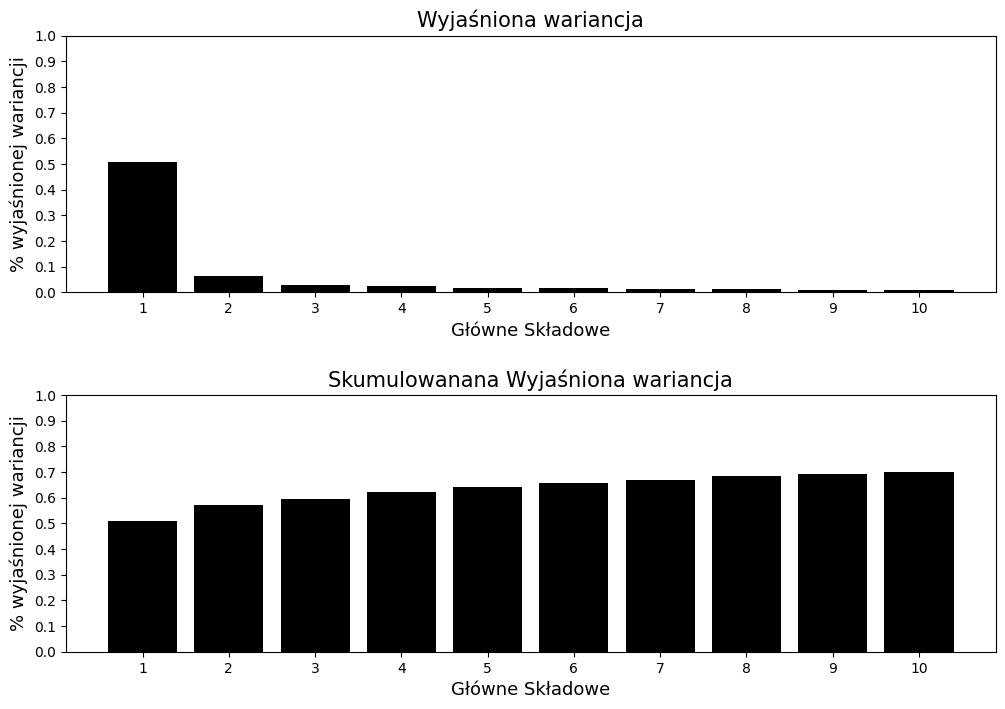

Główna składowa:  1 Wyjaśniona wariancja:  0.50738 Skumulowana Wyjaśniona wariancja:  0.50738
Główna składowa:  2 Wyjaśniona wariancja:  0.06239 Skumulowana Wyjaśniona wariancja:  0.56977
Główna składowa:  3 Wyjaśniona wariancja:  0.02693 Skumulowana Wyjaśniona wariancja:  0.5967
Główna składowa:  4 Wyjaśniona wariancja:  0.02453 Skumulowana Wyjaśniona wariancja:  0.62123
Główna składowa:  5 Wyjaśniona wariancja:  0.01889 Skumulowana Wyjaśniona wariancja:  0.64012
Główna składowa:  6 Wyjaśniona wariancja:  0.01631 Skumulowana Wyjaśniona wariancja:  0.65643
Główna składowa:  7 Wyjaśniona wariancja:  0.01415 Skumulowana Wyjaśniona wariancja:  0.67058
Główna składowa:  8 Wyjaśniona wariancja:  0.01216 Skumulowana Wyjaśniona wariancja:  0.68274
Główna składowa:  9 Wyjaśniona wariancja:  0.00985 Skumulowana Wyjaśniona wariancja:  0.69259
Główna składowa:  10 Wyjaśniona wariancja:  0.00949 Skumulowana Wyjaśniona wariancja:  0.70208


In [86]:
fig = plt.figure(figsize=(12,8))
fig.subplots_adjust(wspace=.4, hspace=.4)
ax = fig.add_subplot(2, 1, 1)
ax.bar(range(1, 1+pca.n_components_), pca.explained_variance_ratio_, color='black')
ax.set(xticks=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
plt.yticks(np.arange(0, 1.1, 0.1))
plt.title('Wyjaśniona wariancja', fontsize=15)
plt.xlabel('Główne Składowe', fontsize=13)
plt.ylabel('% wyjaśnionej wariancji', fontsize=13)
ax = fig.add_subplot(2, 1, 2)
ax.bar(range(1, 1+pca.n_components_),
       np.cumsum(pca.explained_variance_ratio_), 
       color='black')
ax.set(xticks=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
plt.yticks(np.arange(0, 1.1, 0.1))
plt.title('Skumulowanana Wyjaśniona wariancja', fontsize=15)
plt.xlabel('Główne Składowe', fontsize=13)
plt.ylabel('% wyjaśnionej wariancji', fontsize=13)
plt.show()

principal_component = 1
cum_explained_var = 0
for explained_var in pca.explained_variance_ratio_:
    cum_explained_var += explained_var
    print("Główna składowa: ",principal_component,
          "Wyjaśniona wariancja: ",np.round(explained_var, 5),
          "Skumulowana Wyjaśniona wariancja: ", np.round(cum_explained_var, 5))
    principal_component += 1

In [87]:
X_full_standardized_PCA = X_full_standardized_pca[[0,1]]

Z powyższej analizy wynika, że blisko 57% wariancji jest wyjaśniona przez dwie Główne Składowe.

## KMeans

In [88]:
# tworzymy 19 algorytmów z k od 1 do 19
kmeans_per_k = [
    KMeans(n_clusters=k, random_state=2).fit(X_full_standardized)
    for k in range(2, 20)
]

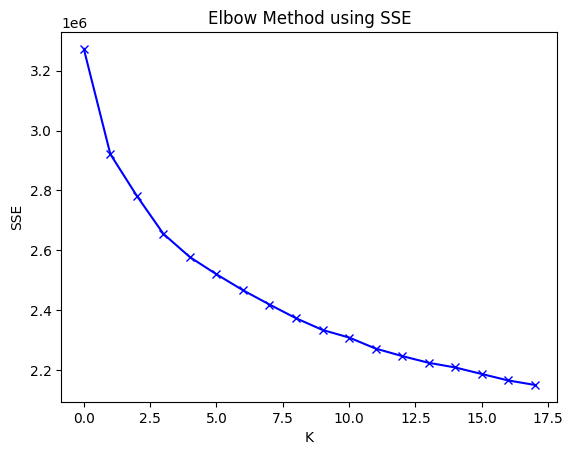

In [89]:
# Elbow Method using SSE 
inertias = [model.inertia_ for model in kmeans_per_k]
plt.plot(range(0, 18), inertias, 'bx-')
plt.xlabel('K')
plt.ylabel('SSE')
plt.title('Elbow Method using SSE')
plt.show()

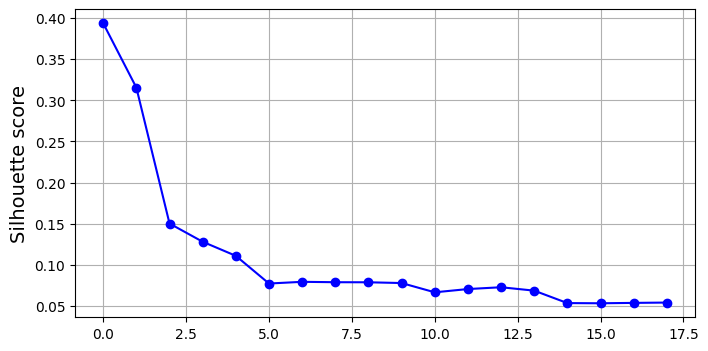

In [90]:
silhouette_scores = [
    silhouette_score(X_full_standardized, model.labels_)
    for model in kmeans_per_k
]
plt.figure(figsize=(8, 4))
plt.plot(range(0, 18),silhouette_scores, "bo-")
plt.ylabel("Silhouette score", fontsize=14)
plt.grid()
plt.show()

Na podstawie powyższych wykresów, mogę uznać że najlepsza ilość klastrów to 2 i 5. Z dostarczonych danych wiem, ze powinno ich być 6.

In [91]:
def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=30, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=3, linewidths=8,
                color=cross_color, zorder=11, alpha=1)

def plot_decision_boundaries(klasyfikator, X):
    # wyznaczanie granic decyzyjnych, podobnie jak w poprzednich notatnikach
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], 100),
                         np.linspace(mins[1], maxs[1], 100))
    Z = klasyfikator.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # rysowanie konturów granic 
    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")
                
    # centra klastrów można wyciągnąc za pomocą zmiennej cluster_centers_
    plot_centroids(klasyfikator.cluster_centers_)
    plt.xlabel("$x_1$", fontsize=14)
    plt.ylabel("$x_2$", fontsize=14, rotation=0)

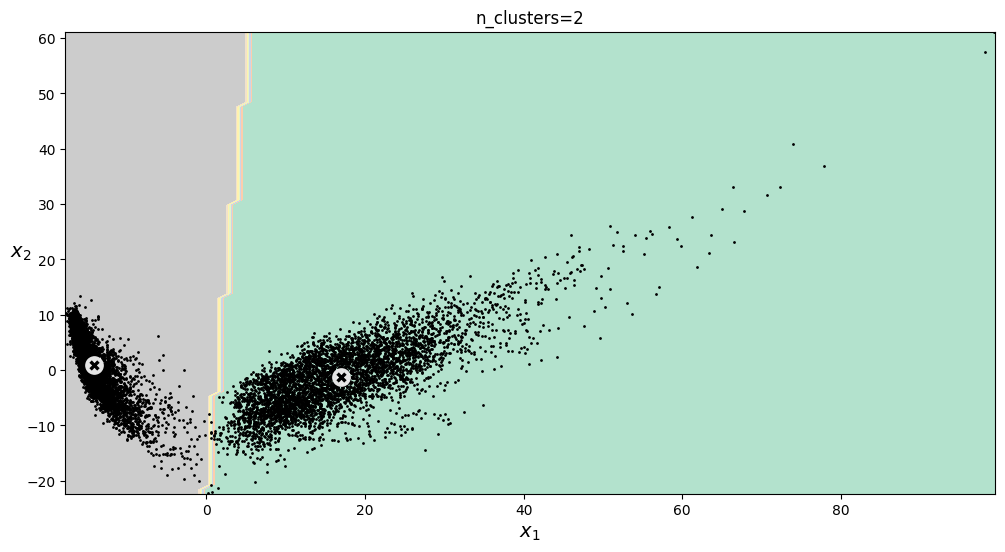

In [92]:
km_2 = KMeans(init="random", n_clusters=2)
y_pred=km_2.fit_predict(X_full_standardized_PCA)
plt.figure(figsize=(12, 6))

plot_decision_boundaries(km_2, X_full_standardized_PCA.values)
plt.plot(X_full_standardized_PCA.values[:, 0], X_full_standardized_PCA.values[:, 1], 'k.', markersize=2)
plt.title('n_clusters=2')
plt.show()

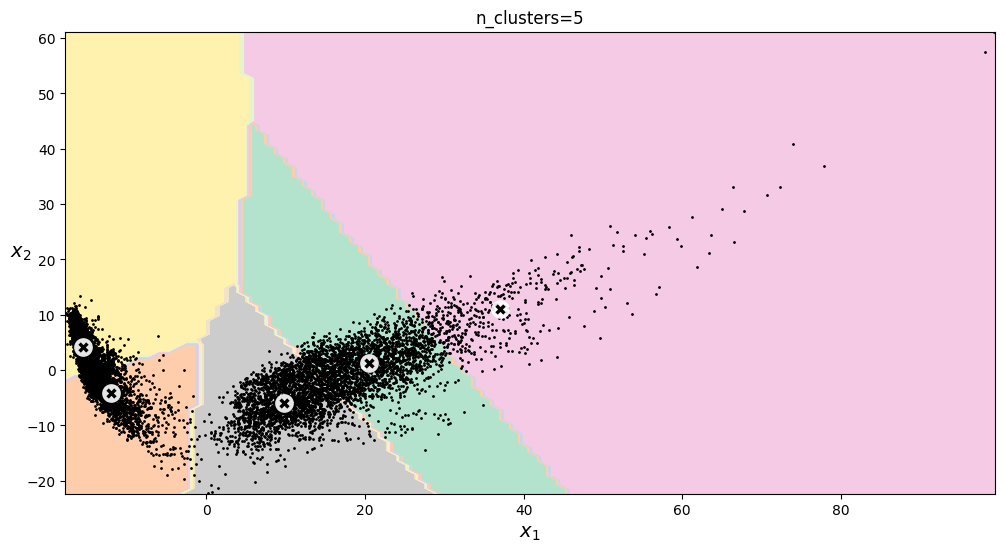

In [93]:
km_5 = KMeans(init="random", n_clusters=5)
y_pred=km_5.fit_predict(X_full_standardized_PCA)
plt.figure(figsize=(12, 6))
plot_decision_boundaries(km_5, X_full_standardized_PCA.values)
plt.plot(X_full_standardized_PCA.values[:, 0], X_full_standardized_PCA.values[:, 1], 'k.', markersize=2)
plt.title('n_clusters=5')
plt.show()

In [94]:
data_full_labeled = pd.concat([X_full_standardized_PCA,y_full],axis=1)
data_full_labeled.columns=['PC1','PC2','Labels']

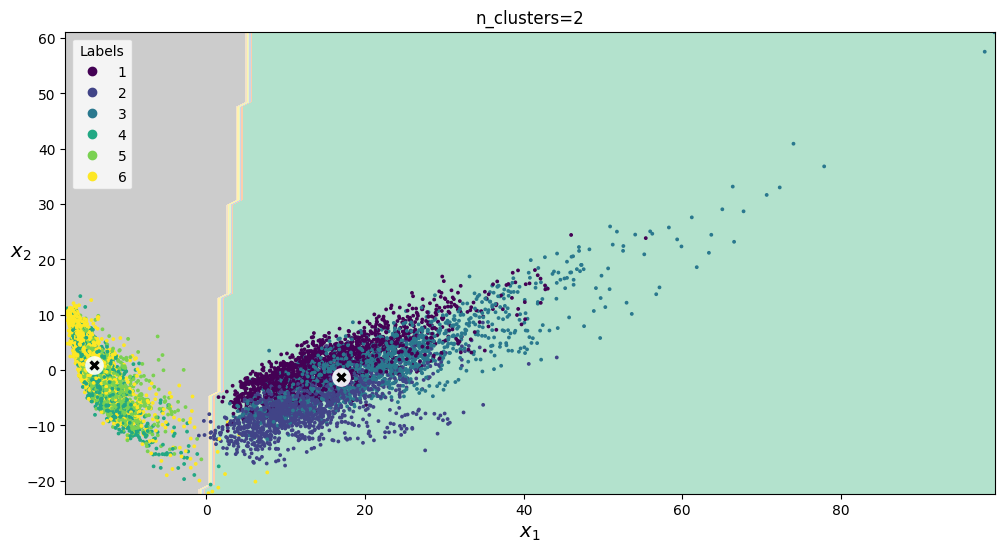

In [95]:
plt.figure(figsize=(12, 6))
plot_decision_boundaries(km_2, X_full_standardized_PCA.values)
scatter=plt.scatter(x=data_full_labeled['PC1'],y=data_full_labeled['PC2'],c=data_full_labeled['Labels'],s=3)
plt.legend(*scatter.legend_elements(),loc="best", title="Labels")
plt.title('n_clusters=2')
plt.show()

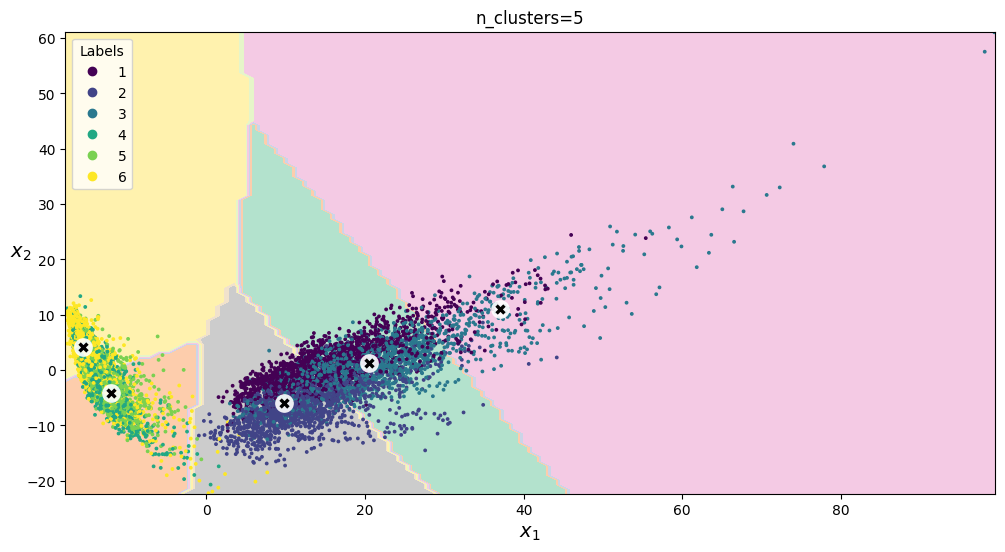

In [96]:
plt.figure(figsize=(12, 6))
plot_decision_boundaries(km_5, X_full_standardized_PCA.values)
scatter=plt.scatter(x=data_full_labeled['PC1'],y=data_full_labeled['PC2'],c=data_full_labeled['Labels'],s=3)
plt.legend(*scatter.legend_elements(),loc="best", title="Labels")
plt.title('n_clusters=5')
plt.show()

Porównując ilość klastrów jedynie w przypadku 2 klastrów ma to jaki kolwiek sens. Widać jedynie podział czynności na ich dynamikę ruchu, gdzie do jednej grupy przydzielono 1, 2 i 3, natomiast do drugiej grupy 4,5 i 6. 
* 1– marsz
* 2– wchodzenie w górę po schodach
* 3– schodzenie w dół ze schodów
* 4– siedzenie
* 5– stanie
* 6– leżenie 

 Jednym zdaniem albo osoba rusza się albo nie ;)

## DBSCAN

In [97]:
dbscan = DBSCAN(eps=1.2, min_samples=5)
dbscan.fit(X_full_standardized)

dbscan_pca = DBSCAN(eps=1.4, min_samples=5)
dbscan_pca.fit(X_full_standardized_PCA)

DBSCAN(eps=1.4)

In [98]:
def plot_dbscan(dbscan, X, size):
    core_mask = np.zeros_like(dbscan.labels_, dtype=bool)
    core_mask[dbscan.core_sample_indices_] = True
    anomalies_mask = dbscan.labels_ == -1
    non_core_mask = ~(core_mask | anomalies_mask)

    cores = dbscan.components_
    anomalies = X[anomalies_mask]
    non_cores = X[non_core_mask]
    
    plt.scatter(cores[:, 0], cores[:, 1],
                c=dbscan.labels_[core_mask], marker='o', s=size, cmap="Paired")
    plt.scatter(cores[:, 0], cores[:, 1], marker='*', s=10, c=dbscan.labels_[core_mask])
    plt.scatter(anomalies[:, 0], anomalies[:, 1],
                c="r", marker="x", s=50)
    plt.scatter(non_cores[:, 0], non_cores[:, 1], c=dbscan.labels_[non_core_mask], marker=".")
    plt.title("eps={:.2f}, min_samples={}".format(dbscan.eps, dbscan.min_samples), fontsize=14)

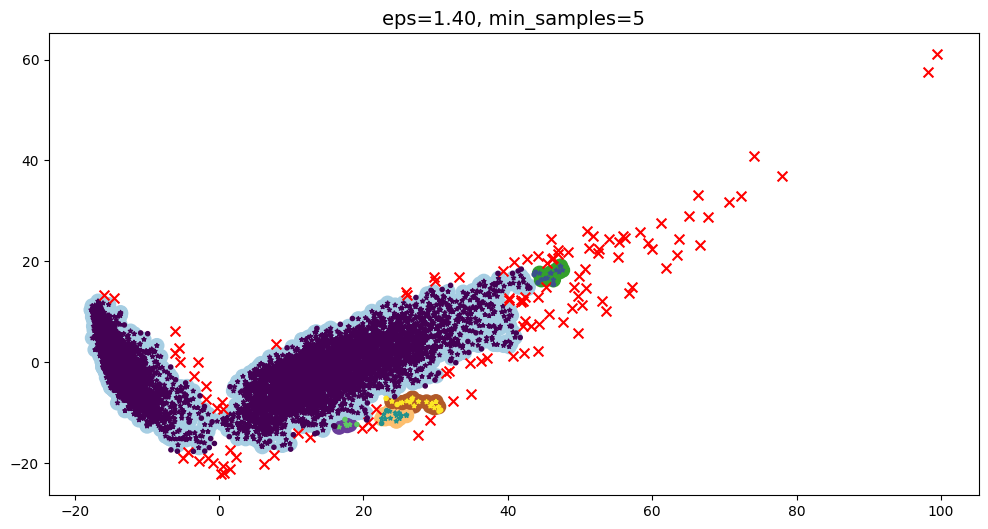

In [99]:
plt.figure(figsize=(12, 6))
plot_dbscan(dbscan_pca, X_full_standardized_PCA.values, size=100)

DBSCAN nie jest w stanie rozdzielić danych na dwa klastry jak było to pokazane wyżej.

## Gaussian Mixture Models 

In [100]:
def plot_gaussian_mixture(clf, X, resolution=1000):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = -clf.score_samples(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z,
                 norm=LogNorm(vmin=1.0, vmax=30.0),
                 levels=np.logspace(0, 2, 12))
    plt.contour(xx, yy, Z,
                norm=LogNorm(vmin=1.0, vmax=30.0),
                levels=np.logspace(0, 2, 12),
                linewidths=1, colors='k')

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contour(xx, yy, Z, linewidths=3, colors='b')
    
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

    plt.xlabel("$x_1$", fontsize=14)
    plt.tick_params(labelleft=False)

In [101]:
gm = GaussianMixture(n_components=2, n_init=10, random_state=42, covariance_type='tied')
gm.fit(X_full_standardized_PCA)

GaussianMixture(covariance_type='tied', n_components=2, n_init=10,
                random_state=42)

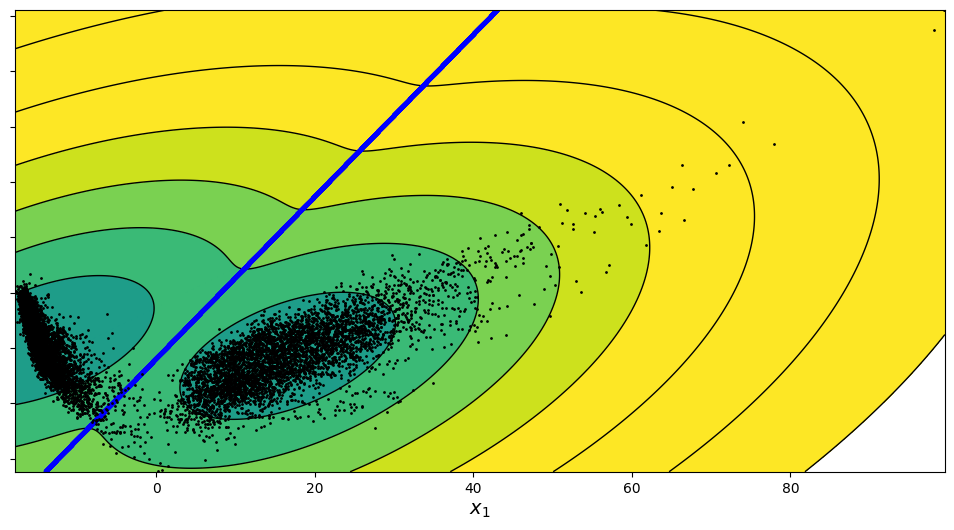

In [102]:
plt.figure(figsize=(12, 6))
plot_gaussian_mixture(gm, X_full_standardized_PCA.values)
plt.show()

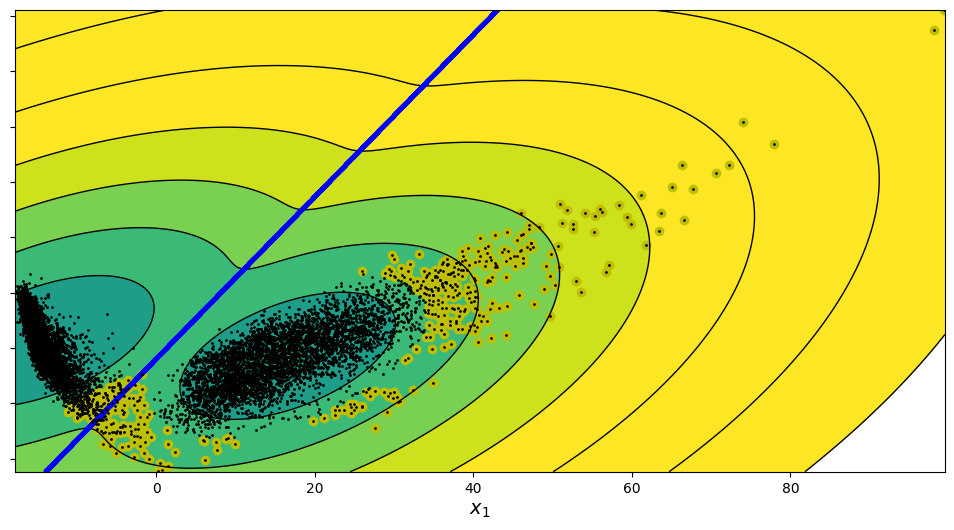

In [103]:
plt.figure(figsize=(12, 6))
plot_gaussian_mixture(gm, X_full_standardized_PCA.values)
density = gm.score_samples(X_full_standardized_PCA.values)
threshold = np.percentile(density, 5)
anomalie = X_full_standardized_PCA.values[density < threshold]
plt.scatter(anomalie[:, 0], anomalie[:, 1], color='y', marker='o')
plt.show()

## Logistic Regression & KNeighbours 

In [104]:
X_train, X_test, y_train, y_test = train_test_split(X_full, y_full, random_state=2, stratify=y_full)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [105]:
#Logistic Regression bez KMeans
log_reg = LogisticRegression(multi_class="ovr", max_iter=5000, random_state=2)
log_reg.fit(X_train, y_train)

print("Logistic Regression bez KMeans:", log_reg.score(X_test, y_test))

#KNeighbours bez KMeans
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

print("KNeighbours bez KMeans :", knn.score(X_test, y_test),'\n')


#Logistic Regression with preprocessing
pipeline_log_reg = Pipeline([
    ("kmeans", KMeans(n_clusters=40,random_state=2)),
    ("log_reg", LogisticRegression(multi_class="ovr",max_iter=5000,random_state=2)),
])
pipeline_log_reg.fit(X_train, y_train)

print("Logistic Regression z KMeans :", pipeline_log_reg.score(X_test, y_test))


#KNeighbours with preprocessing
pipeline_knn = Pipeline([
    ("kmeans", KMeans(n_clusters=40,random_state=2)),
    ("knn", KNeighborsClassifier(n_neighbors=5)),
])
pipeline_knn.fit(X_train, y_train)

print("KNN z KMeans :", pipeline_knn.score(X_test, y_test))

Logistic Regression bez KMeans: 0.9833009708737864
KNeighbours bez KMeans : 0.9615533980582525 

Logistic Regression z KMeans : 0.9223300970873787
KNN z KMeans : 0.8535922330097088


KMeans tylko pogorszyło wynik.

In [106]:
metrics_dataframe = pd.DataFrame(columns = ['Model', 'F1_score_test','F1_score_train','AUC'])
metrics_dataframe
models = []
models_names = []
predictions_proba_list = []
def calculate_metrics(model, name, X_checked, y_checked, X_trained,y_trained):
    models.append(model)
    models_names.append(name)
    global metrics_dataframe
    predictions = model.predict(X_checked)
    predictions_train= model.predict(X_trained)
    predictions_proba = model.predict_proba(X_checked)
    predictions_proba_list.append(predictions_proba[:,1])

    ############## metryki dla sprawdzanego modelu ################
    # Precision, Recall, F1, Accuracy
    print(classification_report(y_checked, predictions))

    # Confusion matrix
    fig = plt.figure(figsize=(5, 5))
    cm = confusion_matrix(y_checked, predictions)
    ax = sns.heatmap(cm, annot=True, cmap='Blues', fmt='.0f')
    ax.set_title('Confusion Matrix\n\n')
    ax.set_xlabel('\nPredicted Values')
    ax.set_ylabel('Actual Values ')
    plt.show()

    # plot ROC curve
    fig = plt.figure(figsize=(5, 5))
    plt.plot([0, 1], [0, 1], 'k--')
    for model_selected, name_selected, pred_proba in zip(models, models_names, predictions_proba_list):
        fpr, tpr, thresholds = roc_curve(y_checked, pred_proba, pos_label=1)
        plt.plot(fpr, tpr, label=name_selected)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc='lower right')
    plt.show()

    f1_metric_test = f1_score(y_checked, predictions,average = 'weighted')
    f1_metric_train = f1_score(y_trained, predictions_train,average = 'weighted')
    auc_metric = roc_auc_score(y_checked, predictions_proba,multi_class = 'ovr')

    metrics_dataframe = metrics_dataframe.append({'Model': name, 'F1_score_test': f1_metric_test,'F1_score_train': f1_metric_train, 'AUC': auc_metric},
                                                 ignore_index=True)
    return metrics_dataframe

              precision    recall  f1-score   support

           1       1.00      1.00      1.00       431
           2       0.99      1.00      0.99       386
           3       1.00      0.99      1.00       351
           4       0.96      0.95      0.96       444
           5       0.96      0.96      0.96       477
           6       1.00      1.00      1.00       486

    accuracy                           0.98      2575
   macro avg       0.98      0.98      0.98      2575
weighted avg       0.98      0.98      0.98      2575



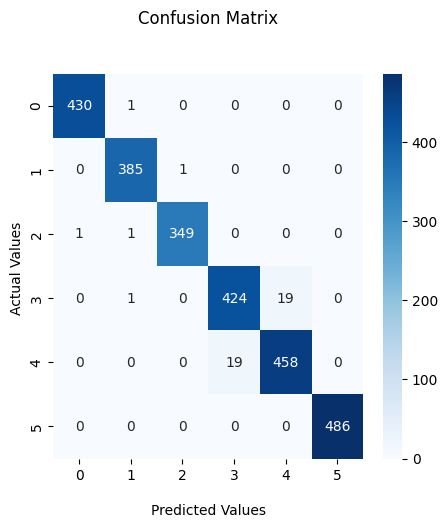

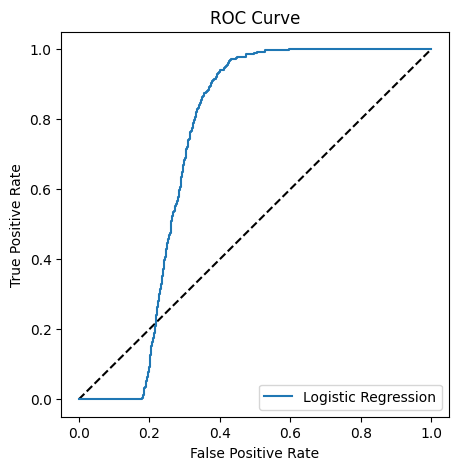

              precision    recall  f1-score   support

           1       0.97      1.00      0.98       431
           2       0.98      0.98      0.98       386
           3       0.99      0.95      0.97       351
           4       0.94      0.89      0.91       444
           5       0.90      0.96      0.93       477
           6       1.00      0.99      0.99       486

    accuracy                           0.96      2575
   macro avg       0.96      0.96      0.96      2575
weighted avg       0.96      0.96      0.96      2575



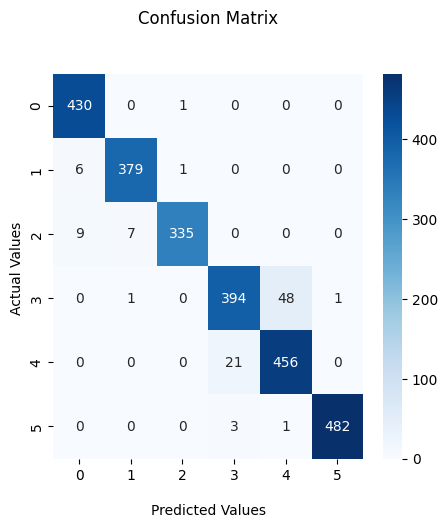

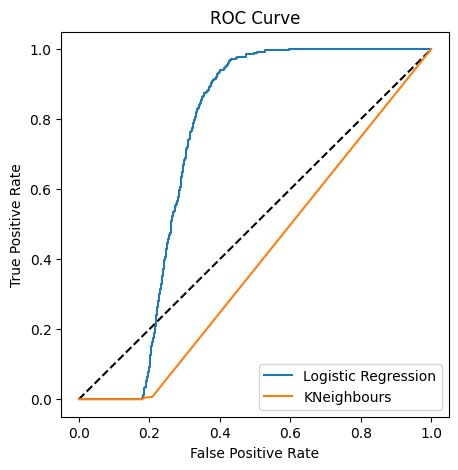

,Model,F1_score_test,F1_score_train,AUC
0,Logistic Regression,0.983294,0.992749,0.999202
1,KNeighbours,0.961487,0.982373,0.996321


In [107]:
calculate_metrics(log_reg, 'Logistic Regression', X_test, y_test, X_train, y_train)
calculate_metrics(knn, 'KNeighbours', X_test, y_test, X_train, y_train)

              precision    recall  f1-score   support

           1       0.97      0.97      0.97       431
           2       0.93      0.95      0.94       386
           3       0.95      0.93      0.94       351
           4       0.87      0.80      0.83       444
           5       0.83      0.89      0.86       477
           6       0.99      1.00      0.99       486

    accuracy                           0.92      2575
   macro avg       0.92      0.92      0.92      2575
weighted avg       0.92      0.92      0.92      2575



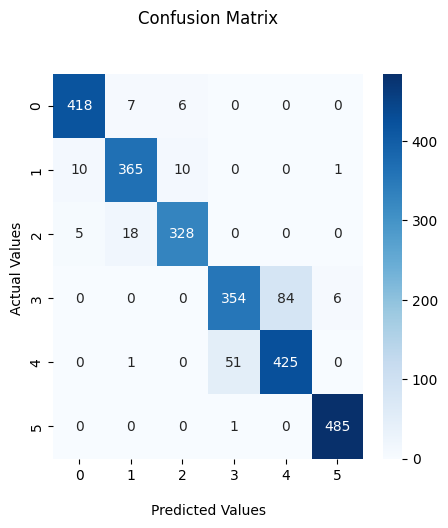

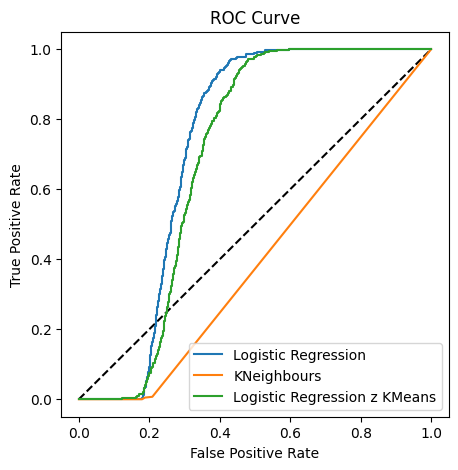

              precision    recall  f1-score   support

           1       0.91      0.93      0.92       431
           2       0.88      0.89      0.89       386
           3       0.86      0.83      0.85       351
           4       0.75      0.68      0.71       444
           5       0.75      0.82      0.78       477
           6       0.96      0.97      0.97       486

    accuracy                           0.85      2575
   macro avg       0.85      0.85      0.85      2575
weighted avg       0.85      0.85      0.85      2575



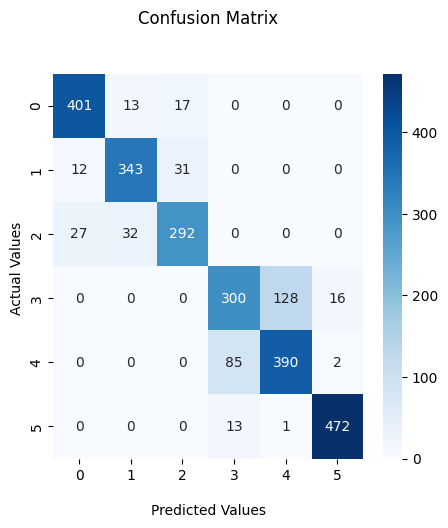

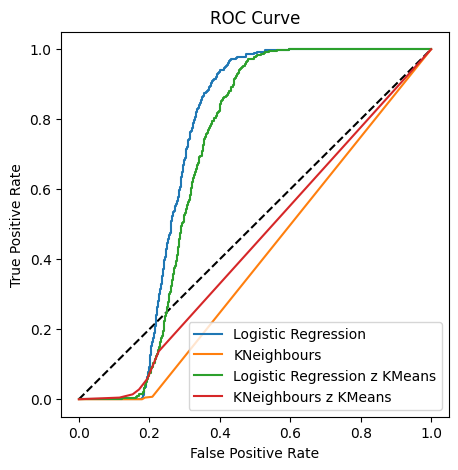

,Model,F1_score_test,F1_score_train,AUC
0,Logistic Regression,0.983294,0.992749,0.999202
1,KNeighbours,0.961487,0.982373,0.996321
2,Logistic Regression z KMeans,0.921959,0.924995,0.994098
3,KNeighbours z KMeans,0.852671,0.901234,0.971061


In [108]:
calculate_metrics(pipeline_log_reg, 'Logistic Regression z KMeans', X_test, y_test, X_train, y_train)
calculate_metrics(pipeline_knn, 'KNeighbours z KMeans', X_test, y_test, X_train, y_train)

### Powyższe modele miały najniższą metrykę F1 dla 4 etykiety, najwyższą dla 6.

* KMeans - algorytm, który znajduje zadaną ilość klastrów
* K-fold - służy do walidacji krzyżowej
* K Nearest Neighbors - jeden z algorytmów klasyfikacji w uczeniu nadzorowanym